In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the dataset
data= pd.read_csv('C:\\Users\\Sanjay\\Desktop\\sql-imarticus\\Paper2\\Datasets\\credit_card.csv')

In [3]:
data.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

In [4]:
data.shape

(8950, 18)

In [5]:
def stats(data):
    stats= pd.DataFrame(data.dtypes, columns=['DataType'])
    stats['Missing_value']= data.isnull().sum().values
    stats['Unique_value']= data.nunique().values
    stats=stats.reset_index()
    return stats

In [6]:
stats(data)

index DataType  Missing_value  Unique_value
0                            CUST_ID   object              0          8950
1                            BALANCE  float64              0          8871
2                  BALANCE_FREQUENCY  float64              0            43
3                          PURCHASES  float64              0          6203
4                   ONEOFF_PURCHASES  float64              0          4014
5             INSTALLMENTS_PURCHASES  float64              0          4452
6                       CASH_ADVANCE  float64              0          4323
7                PURCHASES_FREQUENCY  float64              0            47
8         ONEOFF_PURCHASES_FREQUENCY  float64              0            47
9   PURCHASES_INSTALLMENTS_FREQUENCY  float64              0            47
10            CASH_ADVANCE_FREQUENCY  float64              0            54
11                  CASH_ADVANCE_TRX    int64              0            65
12                     PURCHASES_TRX    int64              0           173
13                      CREDIT_LIMIT  float64              1           205
14                          PAYMENTS  float64              0          8711
15                  MINIMUM_PAYMENTS  float64            313          8636
16                  PRC_FULL_PAYMENT  float64              0            47
17                            TENURE    int64              0             7

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.drop('CUST_ID', inplace=True, axis=1)

In [9]:
data.dropna(inplace=True)

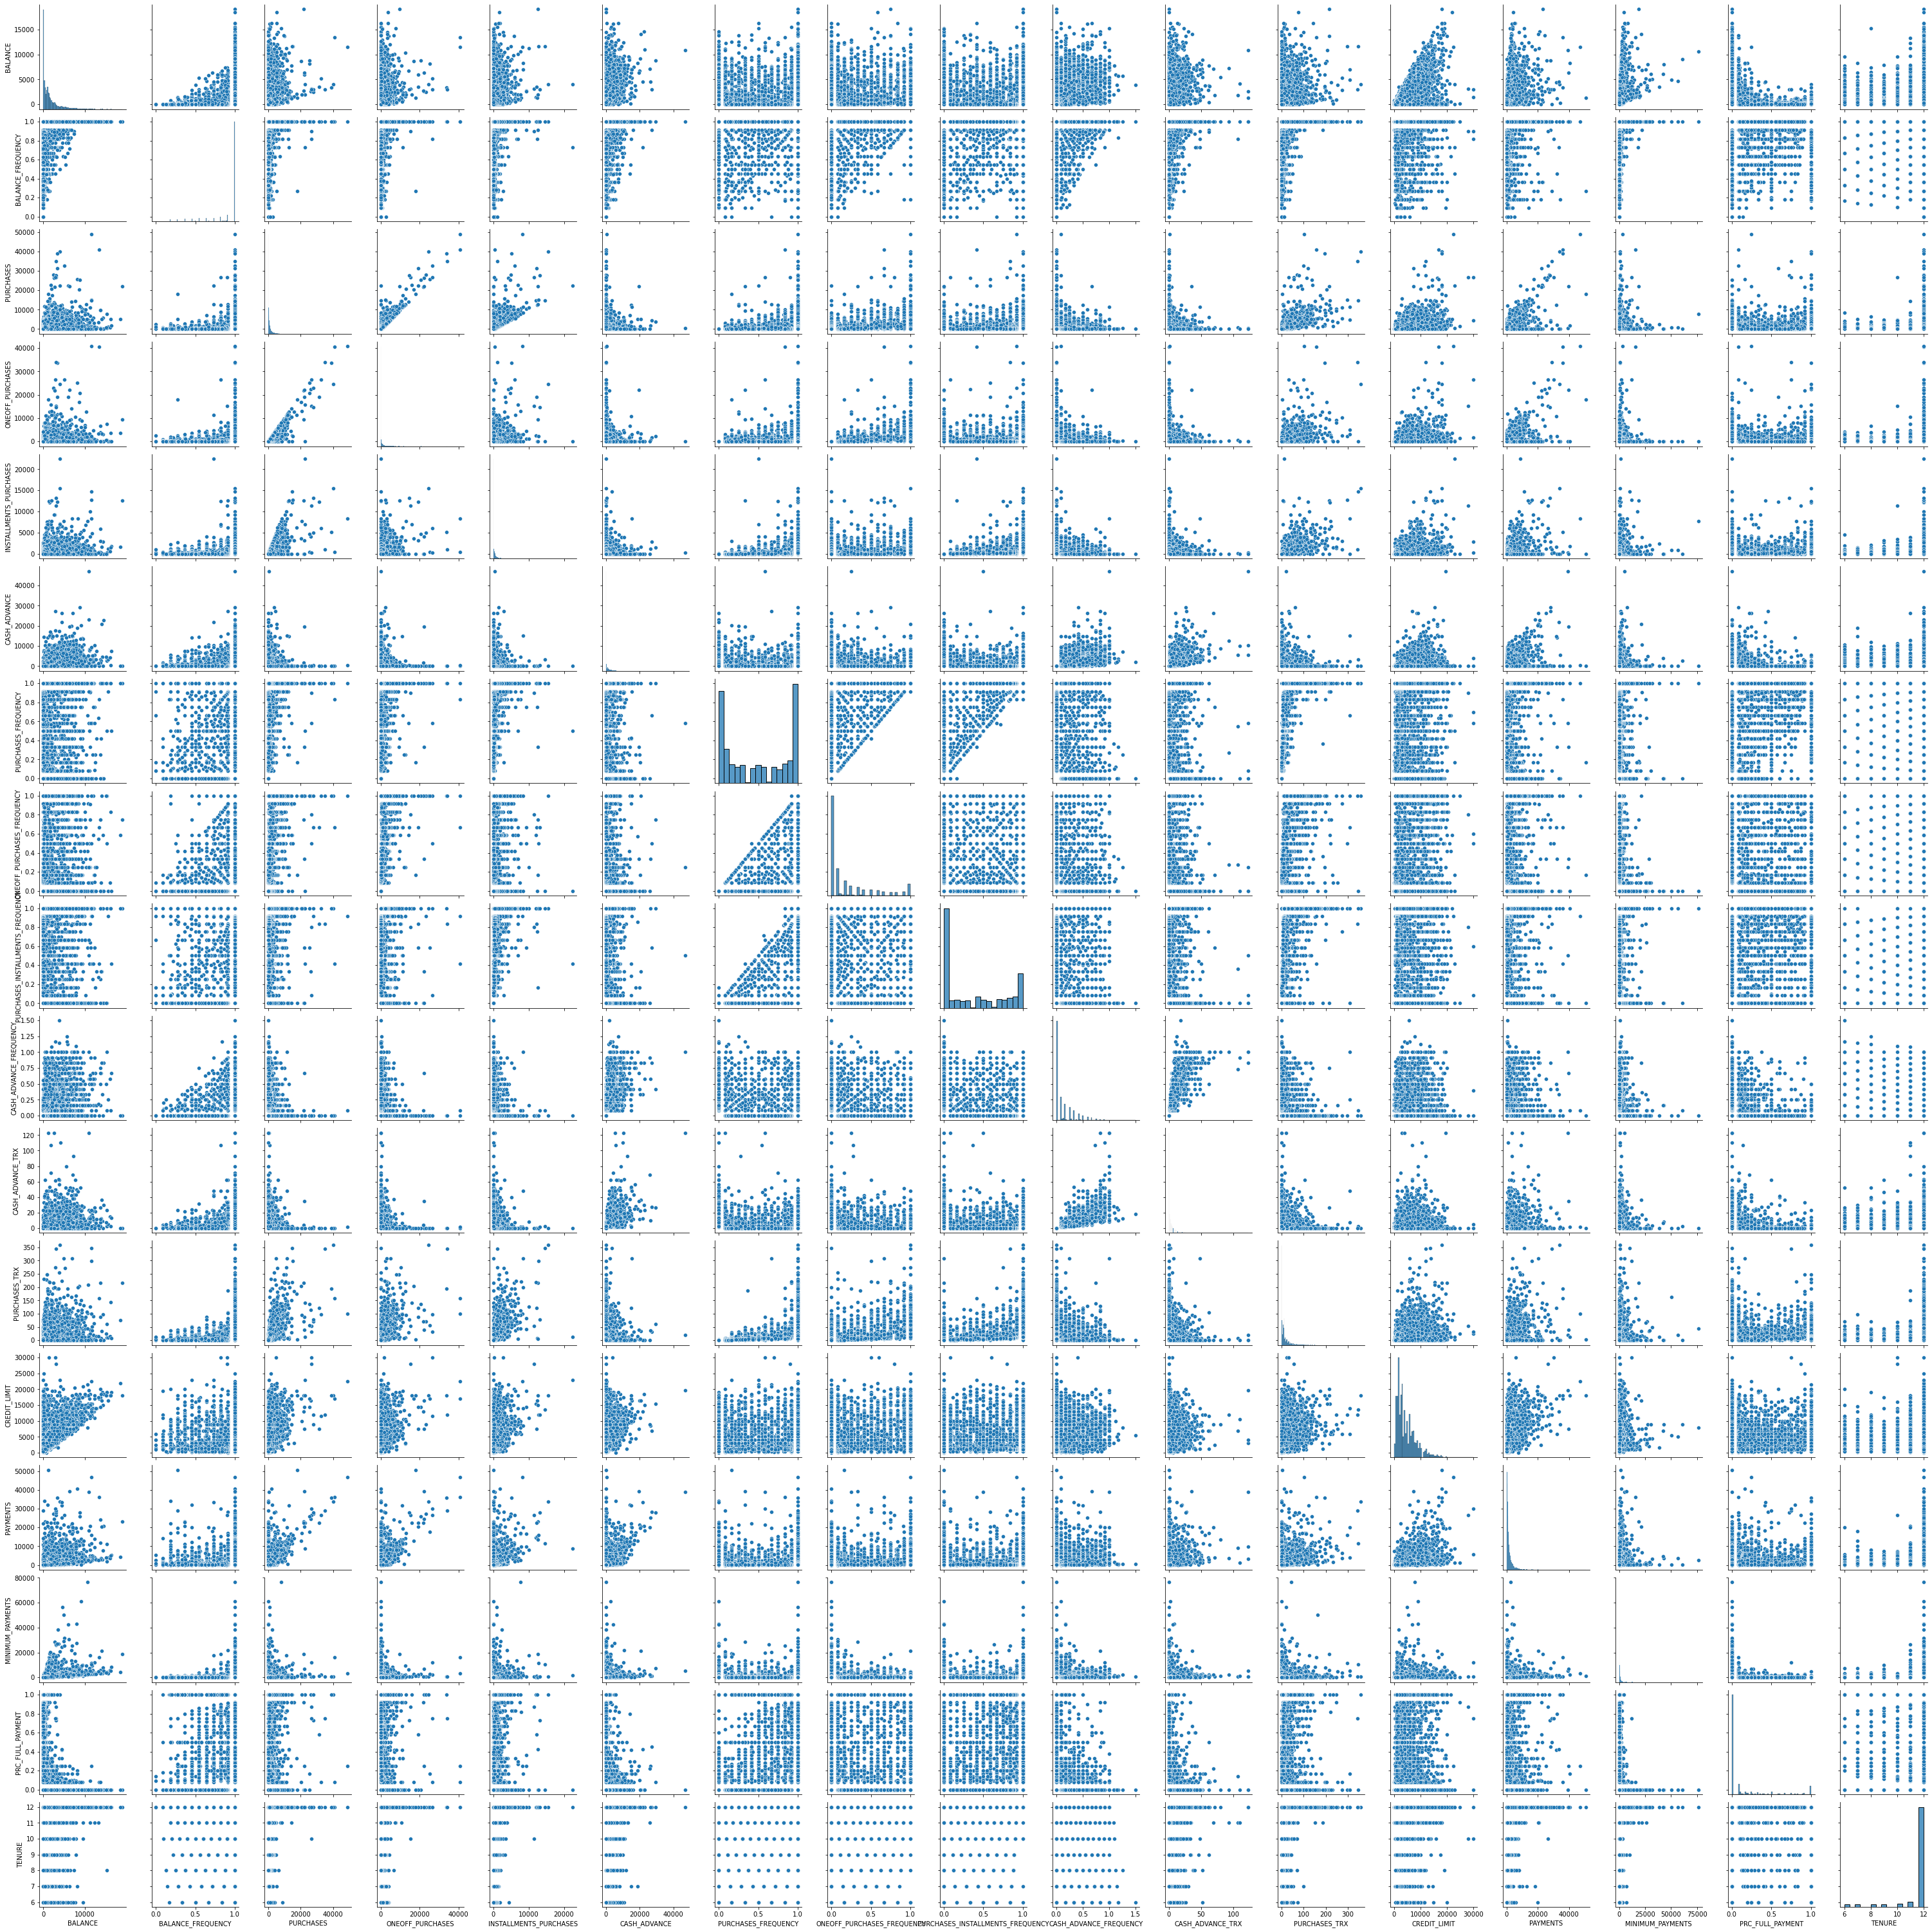

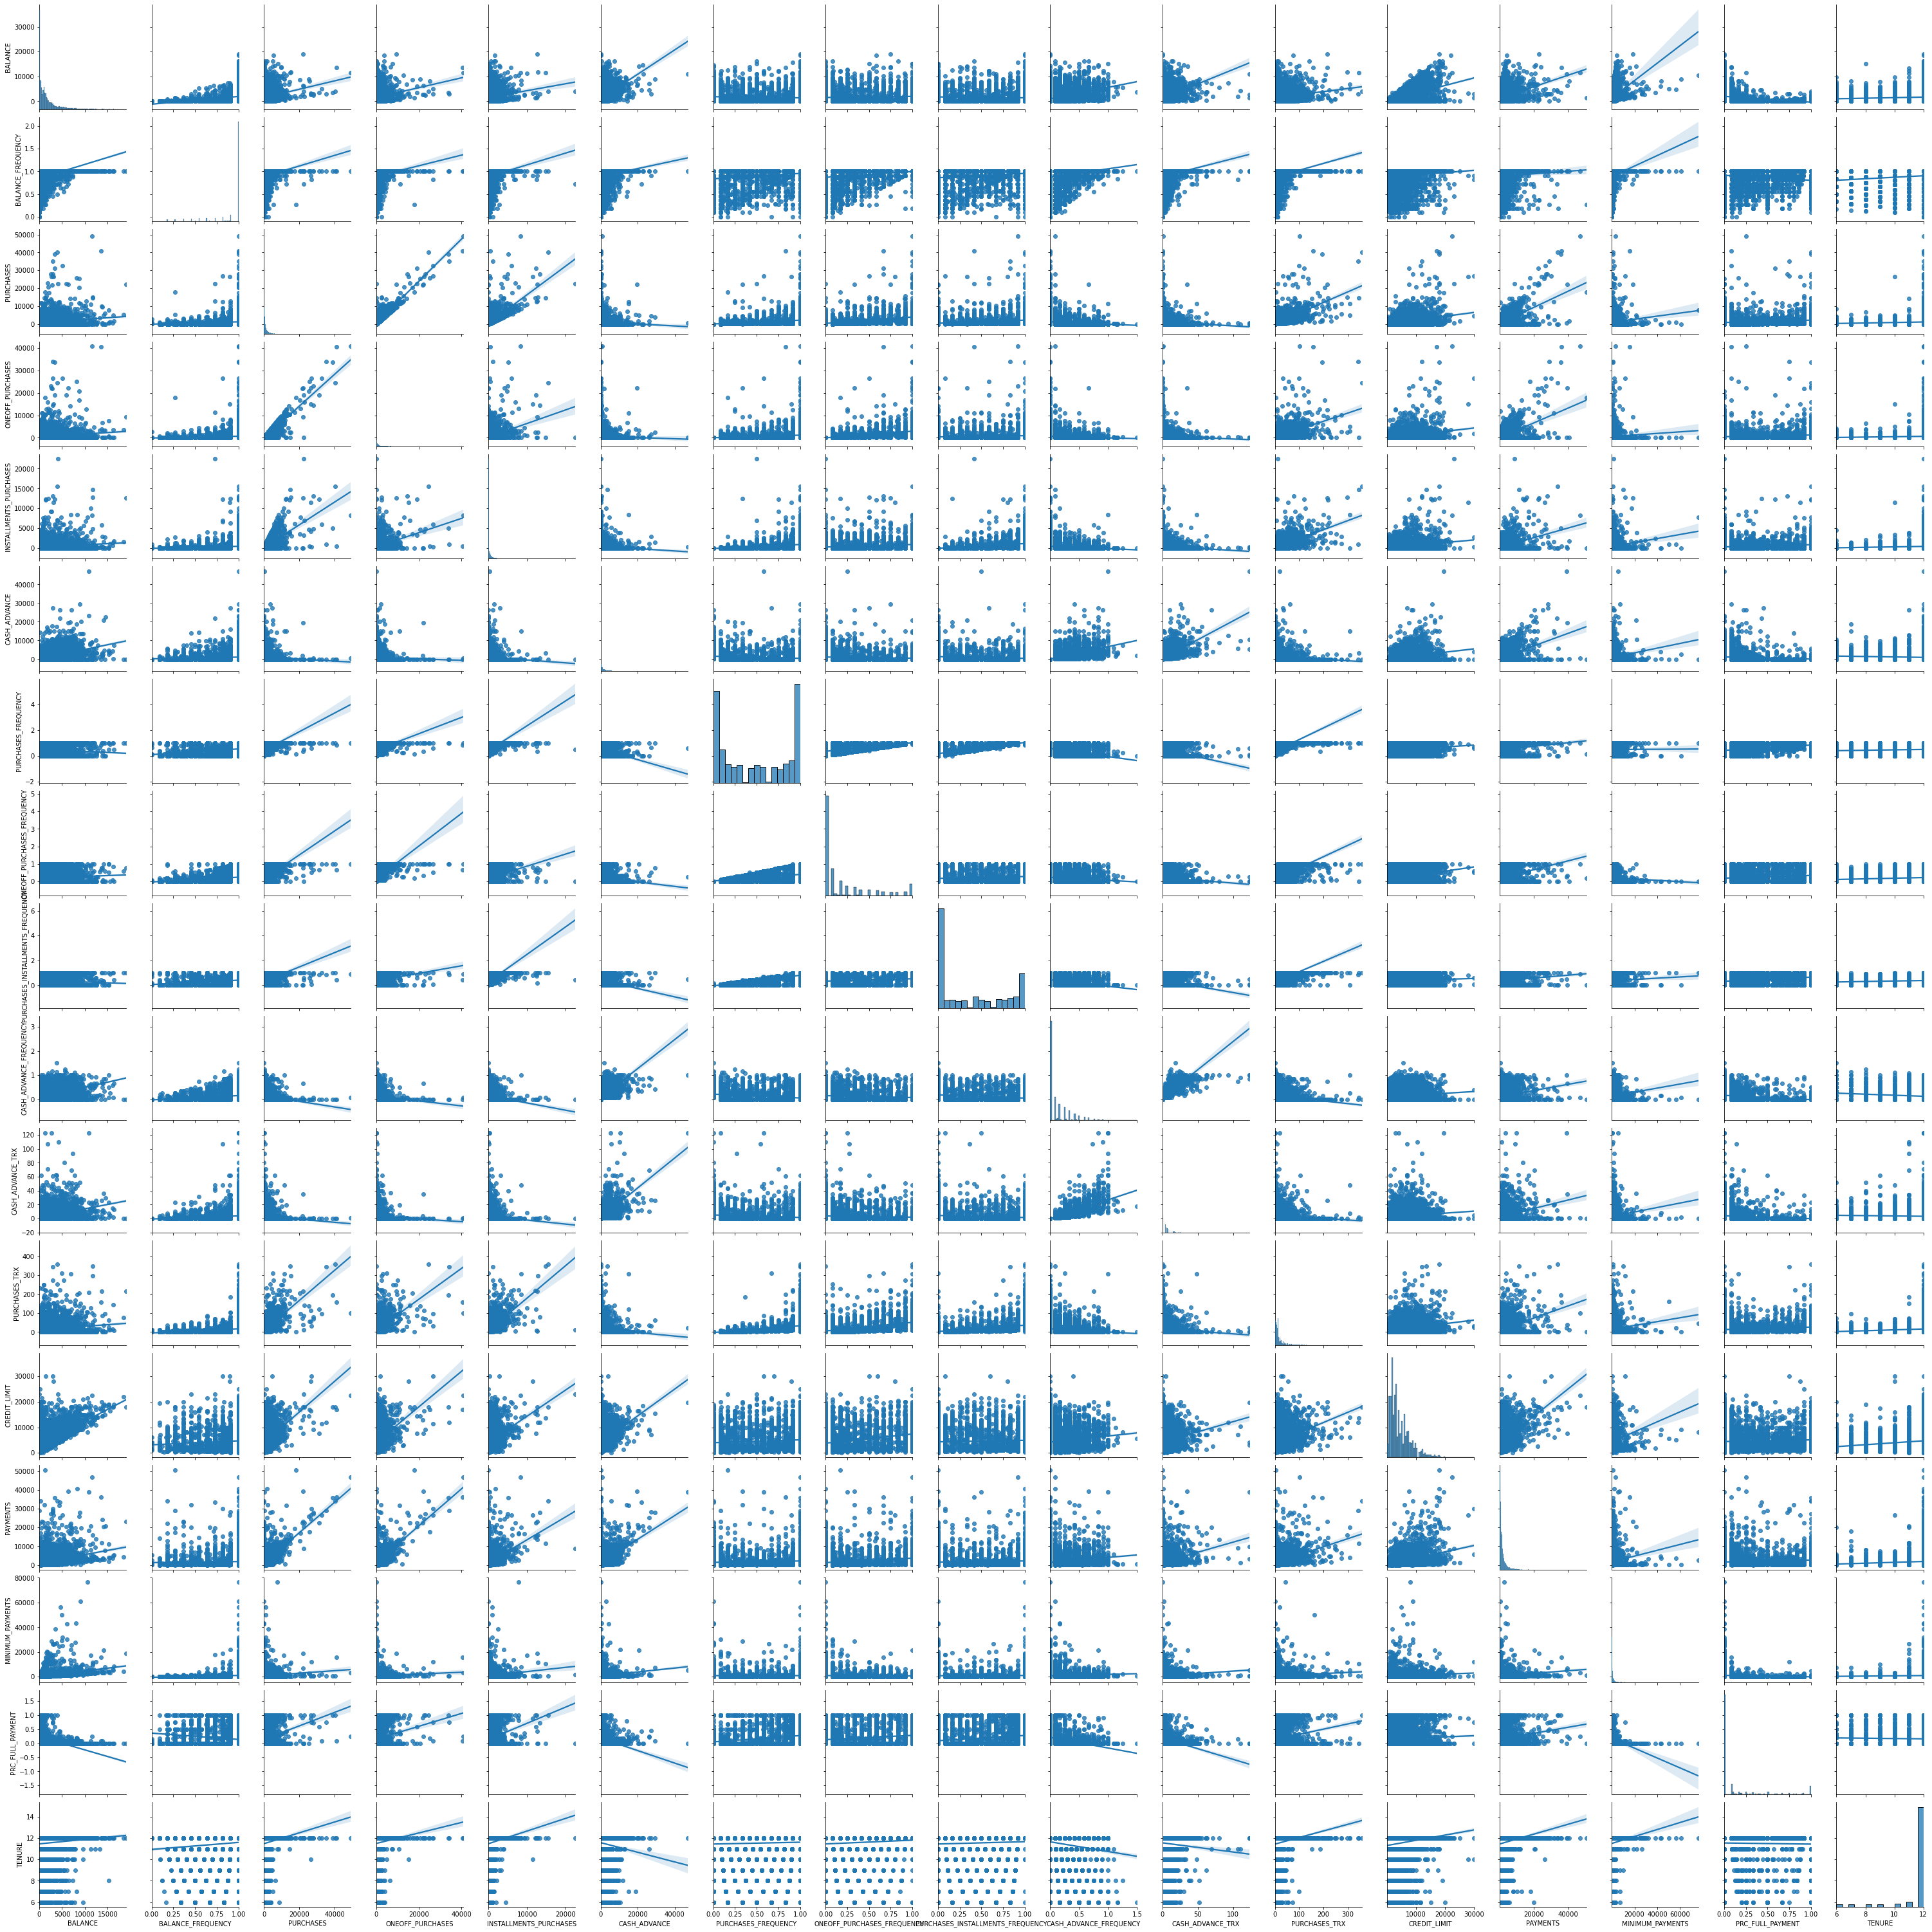

In [10]:
sns.pairplot(data)
sns.pairplot(data,kind = "reg")
plt.show()

In [11]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [12]:
#Through Boxplot we can check the outliers.

In [13]:
def plots(data,col,hue =None):
    sns.boxplot(x=data[col])
    plt.show()
    

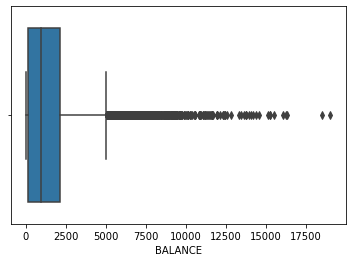

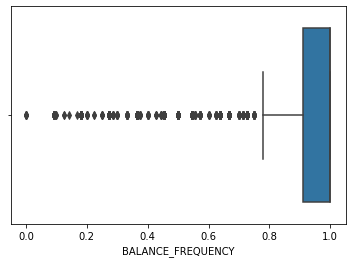

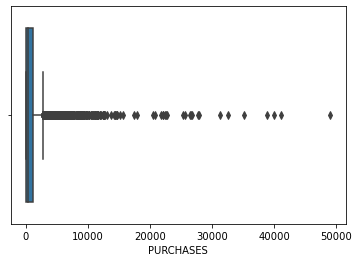

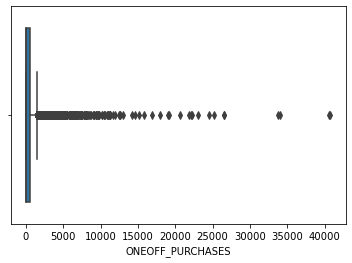

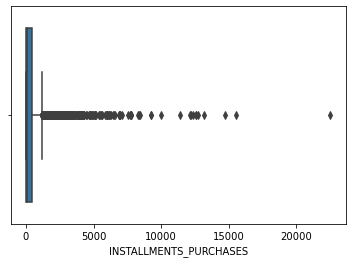

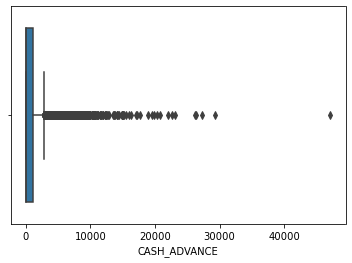

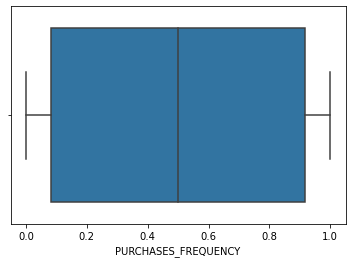

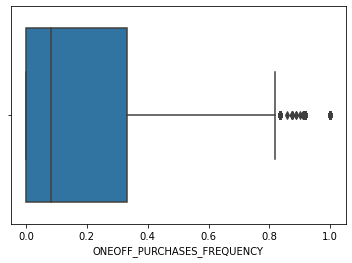

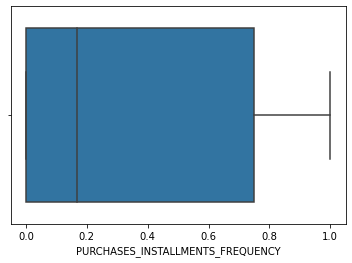

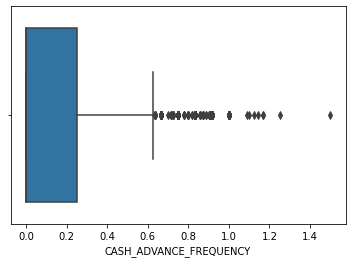

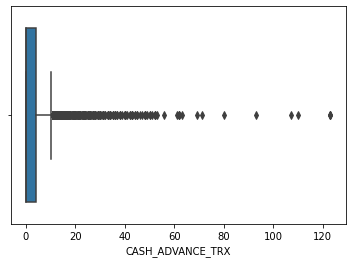

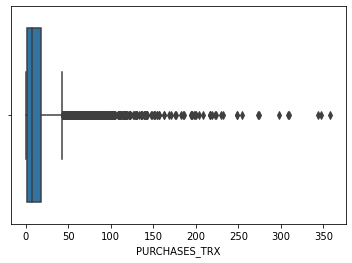

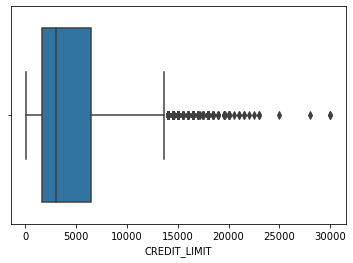

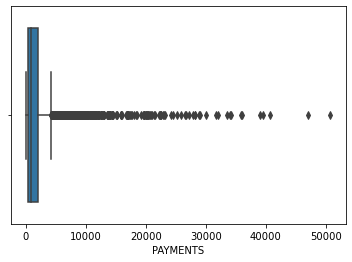

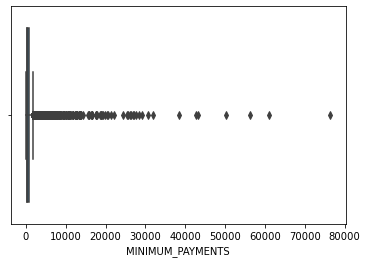

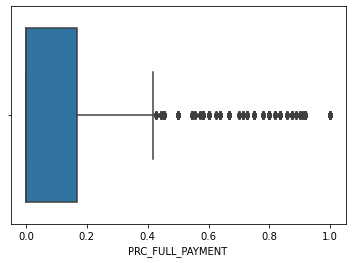

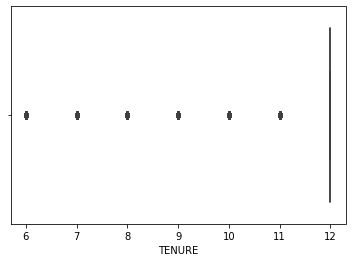

In [14]:
plots(data=data,col='BALANCE')
plots(data=data,col='BALANCE_FREQUENCY')
plots(data=data,col='PURCHASES')
plots(data=data,col='ONEOFF_PURCHASES')
plots(data=data,col='INSTALLMENTS_PURCHASES')
plots(data=data,col='CASH_ADVANCE')
plots(data=data,col='PURCHASES_FREQUENCY')
plots(data=data,col='ONEOFF_PURCHASES_FREQUENCY')
plots(data=data,col='PURCHASES_INSTALLMENTS_FREQUENCY')
plots(data=data,col='CASH_ADVANCE_FREQUENCY')
plots(data=data,col='CASH_ADVANCE_TRX')
plots(data=data,col='PURCHASES_TRX')
plots(data=data,col='CREDIT_LIMIT')
plots(data=data,col='PAYMENTS')
plots(data=data,col='MINIMUM_PAYMENTS')
plots(data=data,col='PRC_FULL_PAYMENT')
plots(data=data,col='TENURE')

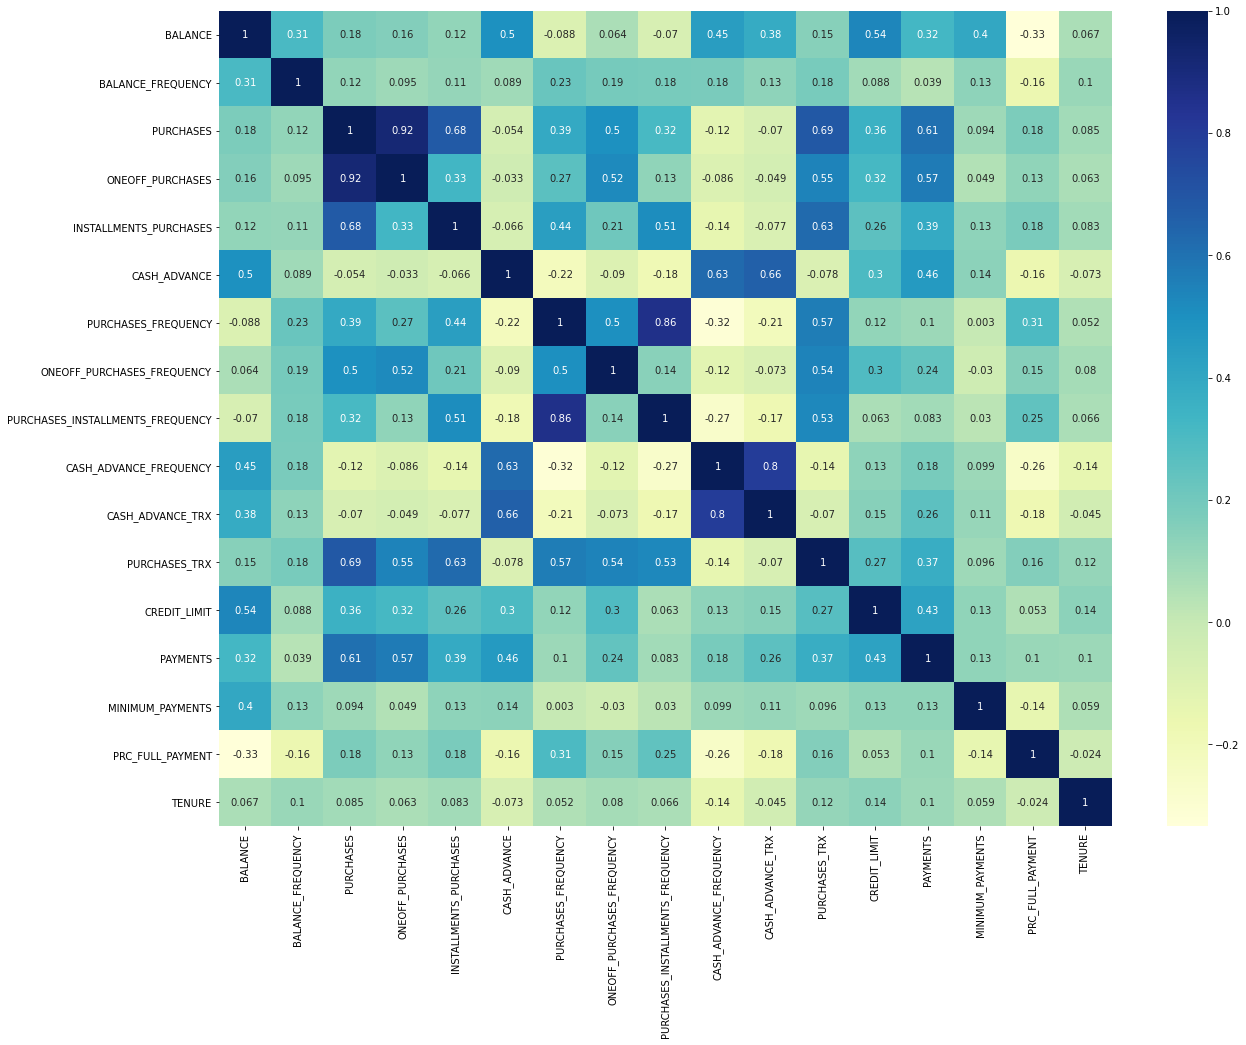

In [15]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Handling Highly Correlated variables.

In [16]:
#From above heatmap we can see that there are many correlated variable. 
data.drop(['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'], axis=1, inplace=True)

### Handling Outliers using Z-Score

In [17]:
from scipy import stats
import numpy as np
z_score = np.abs(stats.zscore(data))
print(z_score)

[[0.74462486 0.37004679 0.35916028 ... 0.30550763 0.53772694 0.35518066]
 [0.76415211 0.06767893 0.35916028 ... 0.08768873 0.21238001 0.35518066]
 [0.42660239 0.50540465 0.09990947 ... 0.09990611 0.53772694 0.35518066]
 ...
 [0.75297728 0.29709491 0.35916028 ... 0.32957217 0.30614422 4.22180042]
 [0.75772142 0.29709491 0.35916028 ... 0.34081076 0.30614422 4.22180042]
 [0.58627829 1.09958965 0.289957   ... 0.32709767 0.53772694 4.22180042]]


In [18]:
cut_off = 3
print(np.where(z_score > 3))

(array([   5,   18,   19, ..., 8633, 8634, 8635], dtype=int64), array([ 2, 11, 11, ..., 13, 13, 13], dtype=int64))


In [19]:
data_new = data[(z_score < 3).all(axis=1)]
data_new.shape

(7264, 14)

### PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
data_new.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
data_log=np.log1p(data_new[['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']])

In [23]:
scaler= StandardScaler()
data_new= scaler.fit_transform(data_new[['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']])

In [24]:
# Call the PCA 
pca= PCA()
pca.fit_transform(data_new)

array([[-1.20159496, -1.85488887, -0.03566286, ..., -0.19208168,
         0.13151262,  0.17724164],
       [-2.10507423,  3.28105147, -0.659247  , ..., -1.51210667,
         1.36552607,  0.26470895],
       [ 0.68348409,  0.87676307, -1.75735468, ..., -0.14595649,
        -0.29480457, -0.65353301],
       ...,
       [-2.31455187, -1.27179432, -0.68244087, ..., -0.09903626,
        -0.07011503,  0.24238954],
       [-0.6799836 , -1.88443143,  0.74913501, ...,  0.30380681,
        -0.00364611, -0.14255063],
       [-2.17322942, -1.38645192, -0.90404702, ...,  0.56123932,
        -0.46428904,  0.05684272]])

In [25]:
pca.explained_variance_ratio_

array([0.23606498, 0.21513174, 0.10563746, 0.08969421, 0.07197423,
       0.05836675, 0.05221398, 0.04571366, 0.03875451, 0.02165235,
       0.0202944 , 0.01854687, 0.0152662 , 0.01068867])

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.23606498, 0.45119672, 0.55683418, 0.64652839, 0.71850262,
       0.77686937, 0.82908335, 0.87479701, 0.91355151, 0.93520386,
       0.95549826, 0.97404513, 0.98931133, 1.        ])

In [27]:
### By below graph we can get the number of components required that covers 95% of data.

Text(0, 0.5, 'Cumulative expalined variance')

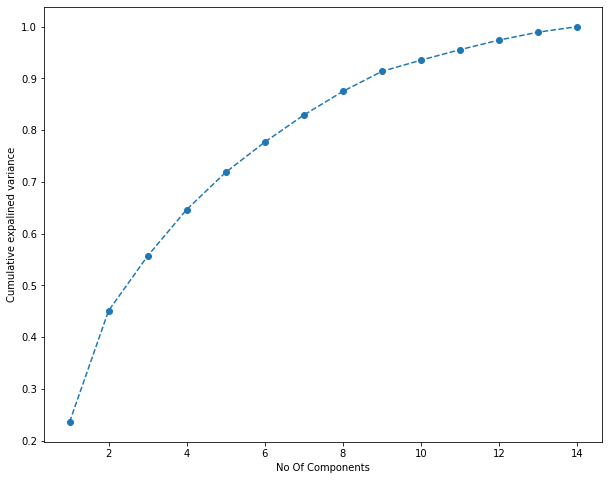

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--' )
plt.xlabel('No Of Components')
plt.ylabel('Cumulative expalined variance')

In [29]:
pca= PCA(n_components=12)
pca_data=pca.fit_transform(data_new)
pca_data.shape

(7264, 12)

In [30]:
pca_data = pd.DataFrame(pca_data)
pca_data.columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12']

In [31]:
pca_data.head(4)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.201595 -1.854889 -0.035663 -0.606961 -0.260826  0.263792  0.509705   
1 -2.105074  3.281051 -0.659247  2.221783 -0.999020  0.472236 -0.304264   
2  0.683484  0.876763 -1.757355 -2.151471 -0.041774 -0.752681 -0.852000   
3 -1.212289 -1.175011 -0.016730 -1.155055 -0.110620  0.456587  0.061505   

       PCA8      PCA9     PCA10     PCA11     PCA12  
0 -0.302971  0.093756  0.158708 -0.079267 -0.192082  
1  0.159974  0.943023 -1.548032 -0.171575 -1.512107  
2 -0.118686 -0.495906 -0.314393 -1.222693 -0.145956  
3  0.037212  0.627767  0.095219 -0.189099 -0.261748

### Kmean-Clustering

In [32]:
from sklearn.cluster import KMeans

### Silhouette Analysis

In [33]:
from sklearn.metrics import silhouette_score
s_score = []
#Iterating to get best silhouette_score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pca_data)
    s_score.append([k, silhouette_score(pca_data, kmeans.labels_)])
    s_avg = silhouette_score(pca_data, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, s_avg))


    

For n_clusters=2, the silhouette score is 0.24147340912996748
For n_clusters=3, the silhouette score is 0.23248465419931044
For n_clusters=4, the silhouette score is 0.17821247240638496
For n_clusters=5, the silhouette score is 0.19759185297108986
For n_clusters=6, the silhouette score is 0.21081061890828126
For n_clusters=7, the silhouette score is 0.20982167802345236
For n_clusters=8, the silhouette score is 0.20650889301806535
For n_clusters=9, the silhouette score is 0.20542367295119912


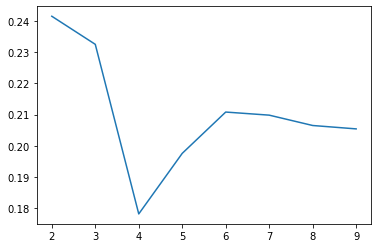

In [34]:
plt.plot(pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1]);

### Elbow Method

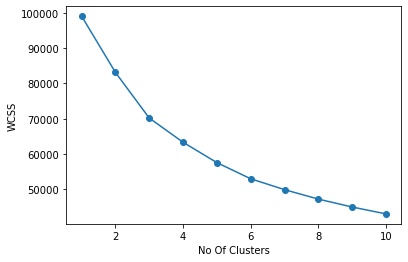

In [35]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1,11), wcss,'o-')
plt.xlabel('No Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [37]:
# final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(pca_data)

KMeans(max_iter=50, n_clusters=2, random_state=42)

In [38]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
pca_data['cluster_id']= kmeans.labels_

In [40]:
pca_data.head(4)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.201595 -1.854889 -0.035663 -0.606961 -0.260826  0.263792  0.509705   
1 -2.105074  3.281051 -0.659247  2.221783 -0.999020  0.472236 -0.304264   
2  0.683484  0.876763 -1.757355 -2.151471 -0.041774 -0.752681 -0.852000   
3 -1.212289 -1.175011 -0.016730 -1.155055 -0.110620  0.456587  0.061505   

       PCA8      PCA9     PCA10     PCA11     PCA12  cluster_id  
0 -0.302971  0.093756  0.158708 -0.079267 -0.192082           0  
1  0.159974  0.943023 -1.548032 -0.171575 -1.512107           0  
2 -0.118686 -0.495906 -0.314393 -1.222693 -0.145956           1  
3  0.037212  0.627767  0.095219 -0.189099 -0.261748           0

### Best K value is 2

C:\Users\Sanjay\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

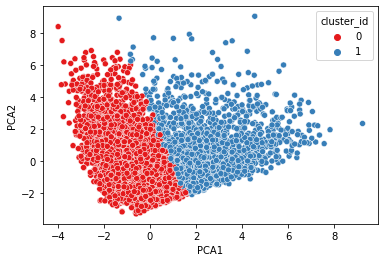

In [41]:
sns.set_palette('Set2')
sns.scatterplot(pca_data.PCA1,pca_data.PCA2,hue=pca_data['cluster_id'],palette='Set1')
